In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv("C:/ExportFile/Full_2007_TH.csv")

# Select numerical columns for descriptive statistics
numerical_columns = [
    "head_age", "hh_size", "no_children_under6", "no_children_schoolage",
    "no_adult", "no_elderly", "PYIncCap", "PMIncCap", "PDIncCap",
    "PYConsaggCap", "PMConsaggCap", "PDConsaggCap", "total_asset",
    "owned_land", "managed_land", "no_land_plot", "no_shocks", "loss_shocks",
    "no_mobilphone", "no_smartphone", "cov_infected_cov", "cov_vaccinated_mem"
]

# Compute descriptive statistics
descriptive_stats = data[numerical_columns].describe()
print(descriptive_stats)

           head_age       hh_size  no_children_under6  no_children_schoolage  \
count  24562.000000  24562.000000        24562.000000           24562.000000   
mean      56.149418      3.982860            0.288413               0.999878   
std       13.399080      1.734714            0.554026               1.065483   
min       18.000000      0.000000            0.000000               0.000000   
25%       46.000000      3.000000            0.000000               0.000000   
50%       55.000000      4.000000            0.000000               1.000000   
75%       66.000000      5.000000            0.000000               2.000000   
max      105.000000     19.000000            5.000000               8.000000   

           no_adult    no_elderly       PYIncCap      PMIncCap      PDIncCap  \
count  24562.000000  24562.000000   21223.000000  21223.000000  21223.000000   
mean       2.068846      0.625723    2216.953112    184.746093      6.069681   
std        1.237364      0.789787    58

In [11]:
# Select variables for correlation analysis
correlation_columns = ["PYIncCap", "hh_size", "head_age", "total_asset", "owned_land"]

# Compute correlation matrix
correlation_matrix = data[correlation_columns].corr()
print(correlation_matrix)

             PYIncCap   hh_size  head_age  total_asset  owned_land
PYIncCap     1.000000 -0.104832  0.021250     0.268317    0.195934
hh_size     -0.104832  1.000000 -0.135357     0.078697    0.117150
head_age     0.021250 -0.135357  1.000000     0.018800    0.072907
total_asset  0.268317  0.078697  0.018800     1.000000    0.218202
owned_land   0.195934  0.117150  0.072907     0.218202    1.000000


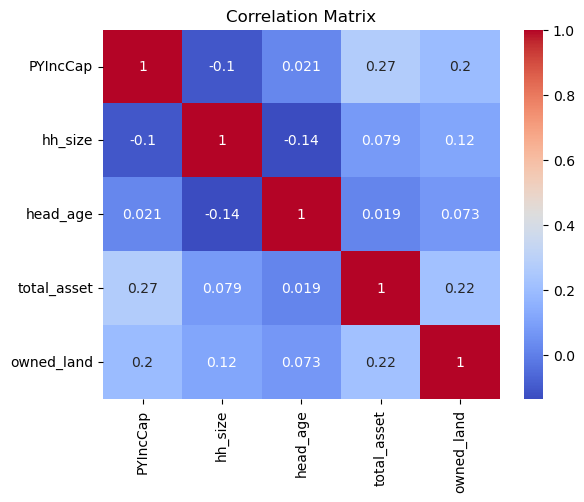

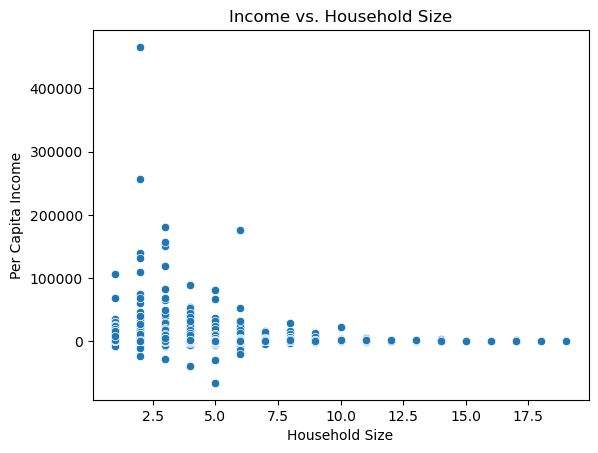

In [12]:


# Heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot: Income vs. Household Size
sns.scatterplot(x="hh_size", y="PYIncCap", data=data)
plt.title("Income vs. Household Size")
plt.xlabel("Household Size")
plt.ylabel("Per Capita Income")
plt.show()

          no_shocks    total_asset
count  21012.000000   21012.000000
mean       1.068152    5241.945734
std        1.225870   13059.251350
min        0.000000       0.000000
25%        0.000000     469.680002
50%        1.000000    1737.142501
75%        2.000000    4394.748261
max       10.000000  866263.740000
Correlation between no_shocks and total_asset: -0.04195459588720729


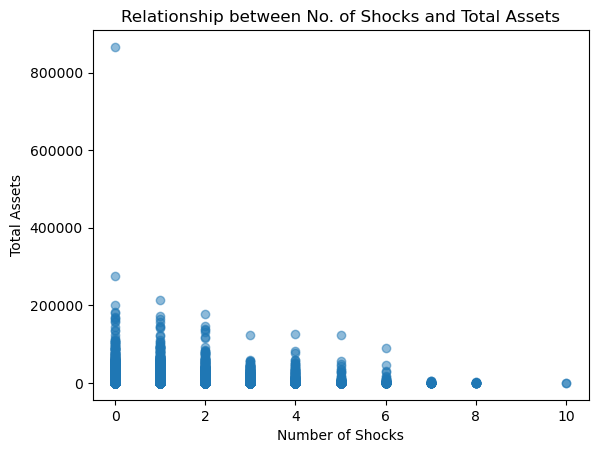

In [ ]:
#Testing the corelation between no_shock and total_asset
# Select relevant columns
shocks_corelelation = ["no_shocks", "total_asset"]

# Drop rows with missing values in the selected columns
data_cleaned = data[shocks_corelelation].dropna()

# Descriptive statistics
print(data_cleaned.describe())

# Correlation analysis
correlation = data_cleaned["no_shocks"].corr(data_cleaned["total_asset"])
print(f"Correlation between no_shocks and total_asset: {correlation}")

# Scatter plot
plt.scatter(data_cleaned["no_shocks"], data_cleaned["total_asset"], alpha=0.5)
plt.title("Relationship between No. of Shocks and Total Assets")
plt.xlabel("Number of Shocks")
plt.ylabel("Total Assets")
plt.show()


In [14]:
# Define the independent (X) and dependent (Y) variables
X = data_cleaned["no_shocks"]
Y = data_cleaned["total_asset"]

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_asset   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     37.05
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.17e-09
Time:                        17:06:21   Log-Likelihood:            -2.2893e+05
No. Observations:               21012   AIC:                         4.579e+05
Df Residuals:                   21010   BIC:                         4.579e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5719.3502    119.393     47.904      0.0